In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [14]:
def sample(p, f, sigma_x):
    x1 = np.random.uniform(-1, 1)
    det = np.random.choice([True, False], p=(p, 1 - p))
    if det:
        epsilon = np.random.normal(0, sigma_x)
        x2 = np.sin(f * x1) + epsilon
    else:
        x2 = np.random.uniform(-1, 1)
    return pd.Series([x1, x2])


# Question 2

In [15]:
p=0.95
f=4
sigma_x=0.1

K=100
eta=1
sigma=4

repetitions=20000

In [16]:
experiment = pd.DataFrame(np.column_stack(
    (np.repeat(p, repetitions), np.repeat(f, repetitions),
     np.repeat(sigma_x, repetitions))),
                          columns=["p", "f", "sigma_x"])


In [17]:
experiment[["x1", "x2"]] = experiment.apply(
    lambda row: sample(row["p"], row["f"], row["sigma_x"]), axis=1)
representation_matrix = np.random.uniform(-1, 1, size=(2, K))


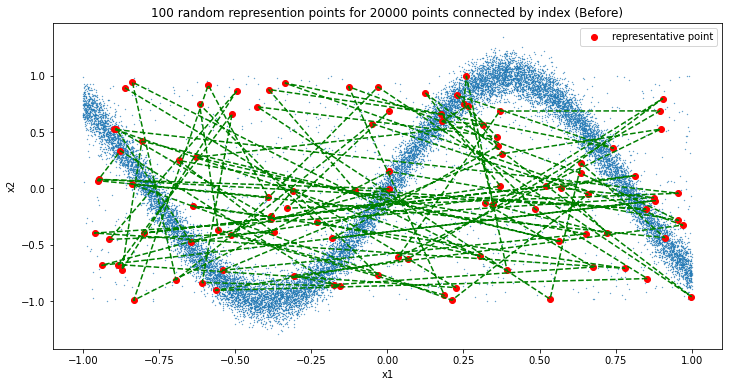

In [18]:
experiment[["x1", "x2"]].plot(kind="scatter",
                              x="x1",
                              y="x2",
                              s=0.1,
                              figsize=(12, 6))
plt.scatter(x=representation_matrix[0],
            y=representation_matrix[1],
            c="r",
            label="representative point")
plt.legend(loc="best")
plt.plot(representation_matrix[0],
         representation_matrix[1],
         c="g",
         linestyle="--")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(
    "100 random represention points for 20000 points connected by index (Before)")

plt.show()

# Question 3

In [19]:
for represention_point in experiment[["x1", "x2"]].values:
    represention_difference = np.repeat(represention_point, K).reshape(2, K) - representation_matrix
    l = np.argmin(np.apply_along_axis(np.linalg.norm, 0, represention_difference))
    s = np.arange(representation_matrix.shape[1]) - np.repeat(
        l, repeats=representation_matrix.shape[1]) 
    pifunc = np.exp(-(s)**2 / (2 * (sigma**2)))
    pifunc /= np.sum(pifunc)
    representation_matrix += eta * represention_difference * pifunc


# Question 4

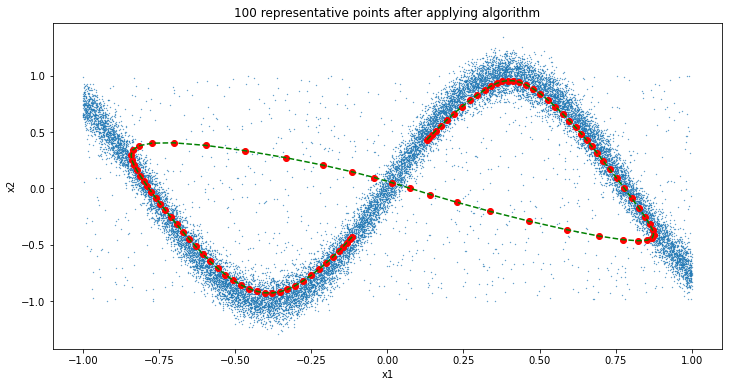

In [20]:
experiment[["x1", "x2"]].plot(kind="scatter",
                              x="x1",
                              y="x2",
                              s=0.1,
                              figsize=(12, 6))
plt.scatter(x=representation_matrix[0],
            y=representation_matrix[1],
            c="r",
            label="representative point")
plt.plot(representation_matrix[0],
         representation_matrix[1],
         c="g",
         linestyle="--")
plt.title("100 representative points after applying algorithm")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()